# Quantium Internship - Data preparation and customer analytics Task 1

**Task 1**

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  



We have chosen to complete this task in R, however you will also find Python to be a useful tool in this piece of analytics. If you aren’t familiar with R or Python we would recommend searching a few online courses to help get you started. We have also provided an R solution template if you want some assistance in getting through this Task. Whilst its possible to complete the task in Excel you may find the size of the data and the nature of the tasks is such that it is more difficult to complete in Excel.  



To get started, download the resource csv data files below and begin performing high level data checks such as:



Creating and interpreting high level summaries of the data
Finding outliers and removing these (if applicable)
Checking data formats and correcting (if applicable)

You will also want to derive extra features such as pack size and brand name from the data and define metrics of interest to enable you to draw insights on who spends on chips and what drives spends for each customer segment. Remember our end goal is to form a strategy based on the findings to provide a clear recommendation to Julia the Category Manager so make sure your insights can have a commercial application.



As we are in the early stages of this analysis Zilinka has asked us to submit our initial findings, so please save your code as a .pdf file and upload it to unlock the model answer.

In [60]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\SARVESH SURVE\\Downloads\\QVI_purchase_behaviour.csv")
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
df1 = pd.read_excel("C:\\Users\\SARVESH SURVE\\Downloads\\QVI_transaction_data.xlsx")
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
# Merge customer data with transaction data based on LYLTY_CARD_NBR
df_merged = pd.merge(df, df1, on='LYLTY_CARD_NBR', how='left')

# Display the merged DataFrame to check the result
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [5]:
df_merged.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [6]:
# Define a function to convert the given "DATE" format to a valid date
def convert_to_date(date_value):
    try:
    
        return pd.to_datetime(date_value, errors='coerce', unit='D', origin='1899-12-30')
    except ValueError:
        try:
            return pd.to_datetime(date_value, errors='coerce', format='%d %b %Y')
        except ValueError:
            return pd.NaT

# Apply the conversion function to the "DATE" column
df_merged['DATE'] = df_merged['DATE'].apply(convert_to_date)

In [7]:
df_merged['DATE'].head()

0   2018-10-17
1   2018-09-16
2   2019-03-07
3   2019-03-08
4   2018-11-02
Name: DATE, dtype: datetime64[ns]

In [8]:
# Examine PROD_NAME
prod_name_counts = df_merged['PROD_NAME'].value_counts()

In [9]:
# Display the counts of each product name
print(prod_name_counts)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64


In [10]:
# Extract and examine individual words in PROD_NAME
import re
product_words = set()
for prod_name in df_merged['PROD_NAME'].unique():
    words = re.findall(r'\b\w+\b', prod_name)  # Extract individual words
    product_words.update(words)


In [11]:
# Remove words with digits and special characters
cleaned_product_words = [word for word in product_words if word.isalpha()]

# Display the cleaned list of product words
print(cleaned_product_words)

['French', 'Chutny', 'Deli', 'Infuzions', 'Roast', 'RRD', 'CCs', 'Corn', 'Stacked', 'ChipCo', 'Big', 'Jam', 'Mango', 'Vinegar', 'Sr', 'Southern', 'Sour', 'GrnWves', 'Sp', 'Medium', 'Whlgrn', 'Ricotta', 'Tom', 'Salted', 'Chp', 'Slt', 'Chimuchurri', 'Lightly', 'Mexicana', 'Snag', 'Strws', 'Potato', 'Cheddr', 'Paso', 'Sea', 'Chs', 'OnionDip', 'Veg', 'Barbecue', 'Soy', 'Garden', 'Original', 'Chicken', 'Originl', 'Crm', 'Waves', 'Chives', 'Cut', 'Dip', 'Mac', 'Twisties', 'Tasty', 'Smiths', 'Tomato', 'Onion', 'Cheezels', 'Chipotle', 'Fig', 'Crips', 'PotatoMix', 'Chip', 'Mozzarella', 'Chips', 'Doritos', 'Hrb', 'Hony', 'Balls', 'Puffs', 'And', 'Lime', 'ChpsBtroot', 'Cream', 'Pesto', 'Rib', 'OnionStacked', 'Of', 'Truffle', 'Infzns', 'Sweet', 'SR', 'FriedChicken', 'Thinly', 'Natural', 'Chnky', 'Maple', 'Dorito', 'Smoked', 'Aioli', 'WW', 'Camembert', 'Rst', 'Spce', 'Mexican', 'Co', 'Tyrrells', 'Chili', 'ChpsFeta', 'Nacho', 'Smith', 'N', 'Woolworths', 'Salsa', 'BBQ', 'Vinegr', 'SourCream', 'Barbeq

**As we are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words**

In [12]:
# Extract and examine individual words in PROD_NAME
product_words = set()
for prod_name in df_merged['PROD_NAME'].unique():
    words = re.findall(r'\b\w+\b', prod_name)  # Extract individual words
    product_words.update(words)

# Removing digits and special characters from productWords
product_words = [word for word in product_words if not any(char.isdigit() for char in word)]
product_words = [word for word in product_words if word.isalpha()]

# Count the occurrences of each word and sort them by frequency
word_counts = {word: df_merged['PROD_NAME'].str.contains(word).sum() for word in product_words}
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_counts)

# Remove salsa products
df_merged = df_merged[~df_merged['PROD_NAME'].str.lower().str.contains('salsa')]

# Summarize the data to check for nulls and possible outliers
summary = df_merged

[('S', 170171), ('Chip', 74570), ('D', 58157), ('Chips', 49770), ('Kettle', 41288), ('Co', 39312), ('Salt', 37132), ('Smith', 31823), ('Smiths', 28860), ('Dorito', 28147), ('Cheese', 27890), ('Pringles', 25102), ('Doritos', 24962), ('Crinkle', 23960), ('Cream', 23222), ('Cut', 22194), ('Corn', 22063), ('Chicken', 21660), ('Original', 21560), ('Sour', 20178), ('Sea', 18727), ('Salsa', 18094), ('Chilli', 15390), ('Sweet', 14302), ('Thins', 14075), ('N', 13639), ('Chp', 12765), ('Sp', 12728), ('Crisps', 12607), ('Vinegar', 12402), ('RRD', 11894), ('Pot', 11146), ('Infuzions', 11057), ('Supreme', 10963), ('Chives', 10951), ('Tom', 10794), ('Dip', 10762), ('WW', 10320), ('Popd', 9693), ('Cobs', 9693), ('Tortilla', 9580), ('Tostitos', 9471), ('Twisties', 9454), ('Light', 9436), ('BBQ', 9434), ('Sensations', 9429), ('Lime', 9347), ('Paso', 9324), ('El', 9324), ('Old', 9324), ('Onion', 9037), ('Swt', 7987), ('Potato', 7889), ('Tomato', 7669), ('Thinly', 7507), ('Chili', 6538), ('Tyrrells', 644

In [13]:
# Filter the dataset to find the outlier
outliers = df_merged[df_merged['PROD_QTY'] == 200]
print(outliers)

        LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER       DATE  STORE_NBR  \
221625          226000  OLDER FAMILIES          Premium 2018-08-19        226   
221626          226000  OLDER FAMILIES          Premium 2019-05-20        226   

        TXN_ID  PROD_NBR                         PROD_NAME  PROD_QTY  \
221625  226201         4  Dorito Corn Chp     Supreme 380g       200   
221626  226210         4  Dorito Corn Chp     Supreme 380g       200   

        TOT_SALES  
221625      650.0  
221626      650.0  


In [14]:
# Let's see if the customer has had other transactions
customer_transactions = df_merged[df_merged['LYLTY_CARD_NBR'] == 226000]
print(customer_transactions)

        LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER       DATE  STORE_NBR  \
221625          226000  OLDER FAMILIES          Premium 2018-08-19        226   
221626          226000  OLDER FAMILIES          Premium 2019-05-20        226   

        TXN_ID  PROD_NBR                         PROD_NAME  PROD_QTY  \
221625  226201         4  Dorito Corn Chp     Supreme 380g       200   
221626  226210         4  Dorito Corn Chp     Supreme 380g       200   

        TOT_SALES  
221625      650.0  
221626      650.0  


In [15]:
# Filter out the customer based on the loyalty card number
df_merged = df_merged[df_merged['LYLTY_CARD_NBR'] != 226000]

In [16]:
# Summarize the data after filtering
summary = df_merged.describe(include='all')
print(summary)

        LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  \
count     2.467400e+05                 246740           246740   
unique             NaN                      7                3   
top                NaN  OLDER SINGLES/COUPLES       Mainstream   
freq               NaN                  50793            95043   
first              NaN                    NaN              NaN   
last               NaN                    NaN              NaN   
mean      1.355303e+05                    NaN              NaN   
std       8.071520e+04                    NaN              NaN   
min       1.000000e+03                    NaN              NaN   
25%       7.001500e+04                    NaN              NaN   
50%       1.303670e+05                    NaN              NaN   
75%       2.030832e+05                    NaN              NaN   
max       2.373711e+06                    NaN              NaN   

                       DATE      STORE_NBR        TXN_ID       PROD_NBR  \


C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_17712\3977384912.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = df_merged.describe(include='all')


In [17]:
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


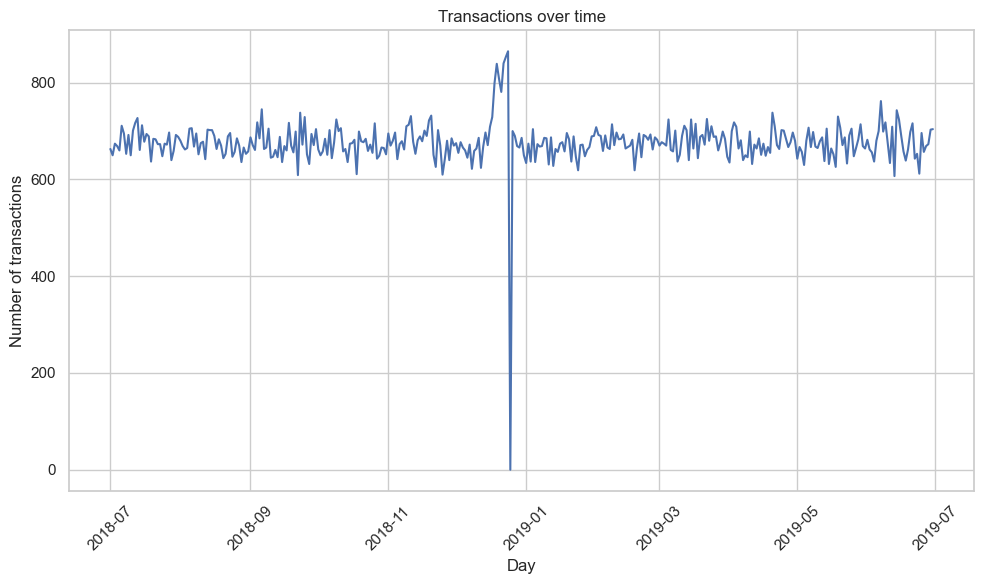

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of transactions by date
transactions_by_date = df_merged.groupby('DATE').size().reset_index(name='N')

# Create a sequence of dates
all_dates = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
all_dates_df = pd.DataFrame({'DATE': all_dates})

# Join the count of transactions by date
transactions_by_day = all_dates_df.merge(transactions_by_date, on='DATE', how='left')
transactions_by_day['N'] = transactions_by_day['N'].fillna(0)  # Fill NaN with 0

# Setting plot themes
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

# Plot transactions over time
plt.plot(transactions_by_day['DATE'], transactions_by_day['N'])
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**We can see that there is an increase in purchases in December and a break in late December. Let’s zoom in
on this.**

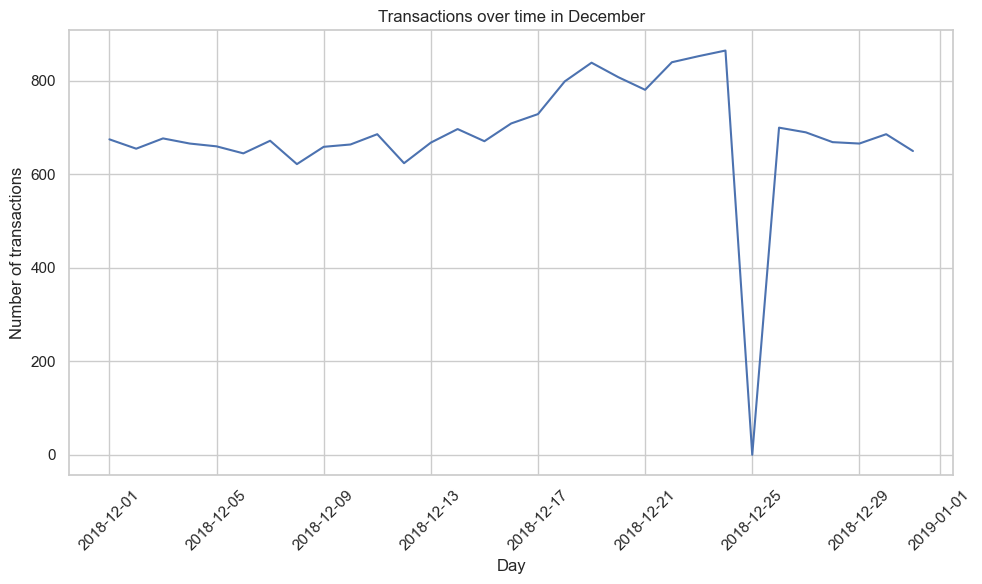

In [20]:
# Filter to December and look at individual days
december_data = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot transactions over time for December
plt.figure(figsize=(10, 6))
plt.plot(december_data['DATE'], december_data['N'])
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time in December')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.
Now that we are satisfied that the data no longer has outliers, we can move on to creating other features
such as brand of chips or pack size from PROD_NAME. We will start with pack size**

In [21]:
import re

# Extract pack sizes from PROD_NAME using regular expressions
df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].str.extract('(\d+)').astype(float)

# Check the occurrences of each pack size
pack_size_counts = df_merged['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'N']
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

print(pack_size_counts)

    PACK_SIZE      N
17       70.0   1507
13       90.0   3008
3       110.0  22387
19      125.0   1454
2       134.0  25102
11      135.0   3257
1       150.0  40203
15      160.0   2970
5       165.0  15297
4       170.0  19983
0       175.0  66390
18      180.0   1468
14      190.0   2995
10      200.0   4473
9       210.0   6272
16      220.0   1564
12      250.0   3169
8       270.0   6285
6       330.0  12540
7       380.0   6416


**The largest size is 380g and the smallest size is 70g - seems sensible!**

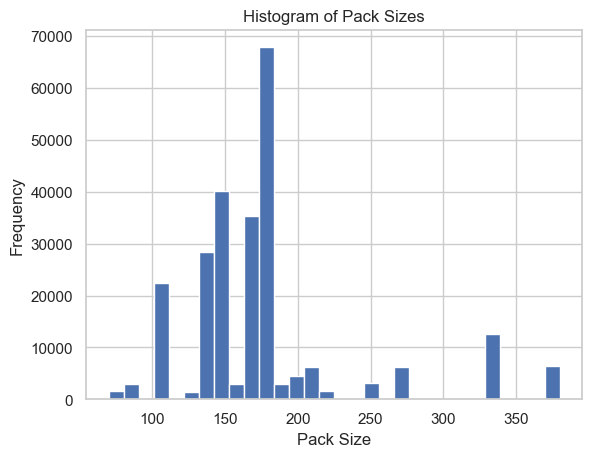

In [22]:
# Extract pack sizes from PROD_NAME using regular expressions
df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].str.extract('(\d+)').astype(float)

# Create a histogram of PACK_SIZE
plt.hist(df_merged['PACK_SIZE'], bins=30)
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Histogram of Pack Sizes')
plt.show()

In [23]:
# Extract brand names from the first word of PROD_NAME
df_merged['BRAND'] = df_merged['PROD_NAME'].str.split().str[0].str.upper()

# Clean up some brand names
brand_mapping = {
    'RED': 'RRD',
    'SNBTS': 'SUNBITES',
    'INFZNS': 'INFUZIONS',
    'WW': 'WOOLWORTHS',
    'SMITH': 'SMITHS',
    'NCC': 'NATURAL',
    'DORITO': 'DORITOS',
    'GRAIN': 'GRNWVES'
}

df_merged['BRAND'] = df_merged['BRAND'].replace(brand_mapping)

# Count the occurrences of each brand
brand_counts = df_merged['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values(by='BRAND')

print(brand_counts)

         BRAND      N
18      BURGER   1564
15         CCS   4551
17     CHEETOS   2927
14    CHEEZELS   4603
8         COBS   9693
2      DORITOS  25224
19      FRENCH   1418
11     GRNWVES   7740
5    INFUZIONS  14201
0       KETTLE  41288
12     NATURAL   7469
3     PRINGLES  25102
4          RRD  16321
1       SMITHS  30353
16    SUNBITES   3008
6        THINS  14075
9     TOSTITOS   9471
10    TWISTIES   9454
13    TYRRELLS   6442
7   WOOLWORTHS  11836


## Examining customer data
**Now that we are happy with the transaction dataset, let’s have a look at the customer dataset.**

In [25]:
# Examine the values of LIFESTAGE and PREMIUM_CUSTOMER
lifestage_counts = df_merged['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'N']
lifestage_counts = lifestage_counts.sort_values(by='N', ascending=False)

premium_customer_counts = df_merged['PREMIUM_CUSTOMER'].value_counts().reset_index()
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'N']
premium_customer_counts = premium_customer_counts.sort_values(by='N', ascending=False)

print("LIFESTAGE counts:")
print(lifestage_counts)

print("\nPREMIUM_CUSTOMER counts:")
print(premium_customer_counts)

LIFESTAGE counts:
                LIFESTAGE      N
0   OLDER SINGLES/COUPLES  50793
1                RETIREES  46431
2          OLDER FAMILIES  45158
3          YOUNG FAMILIES  40494
4   YOUNG SINGLES/COUPLES  33969
5  MIDAGE SINGLES/COUPLES  23398
6            NEW FAMILIES   6497

PREMIUM_CUSTOMER counts:
  PREMIUM_CUSTOMER      N
0       Mainstream  95043
1           Budget  86762
2          Premium  64935


In [27]:
# Check for missing matches
missing_lifestage = df_merged[df_merged['LIFESTAGE'].isnull()].shape[0]
missing_premium_customer = df_merged[df_merged['PREMIUM_CUSTOMER'].isnull()].shape[0]

print("Missing LIFESTAGE matches:", missing_lifestage)
print("Missing PREMIUM_CUSTOMER matches:", missing_premium_customer)

Missing LIFESTAGE matches: 0
Missing PREMIUM_CUSTOMER matches: 0


Data exploration is now complete!

**Data analysis on customer segments**
Now that the data is ready for analysis, we can define some metrics of interest to the client:
*  Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is
*  How many customers are in each segment
*  How many chips are bought per customer by segment
*  What’s the average chip price by customer segment
We could also ask our data team for more information. Examples are:
12
*  The customer’s total spend over the period and total spend for each transaction to understand what
proportion of their grocery spend is on chips
*  Proportion of customers in each customer segment overall to compare against the mix of customers
who purchase chips
Let’s start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by
these segments to describe which customer segment contribute most to chip sales.

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_17712\3658304989.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_sales = sales.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES')


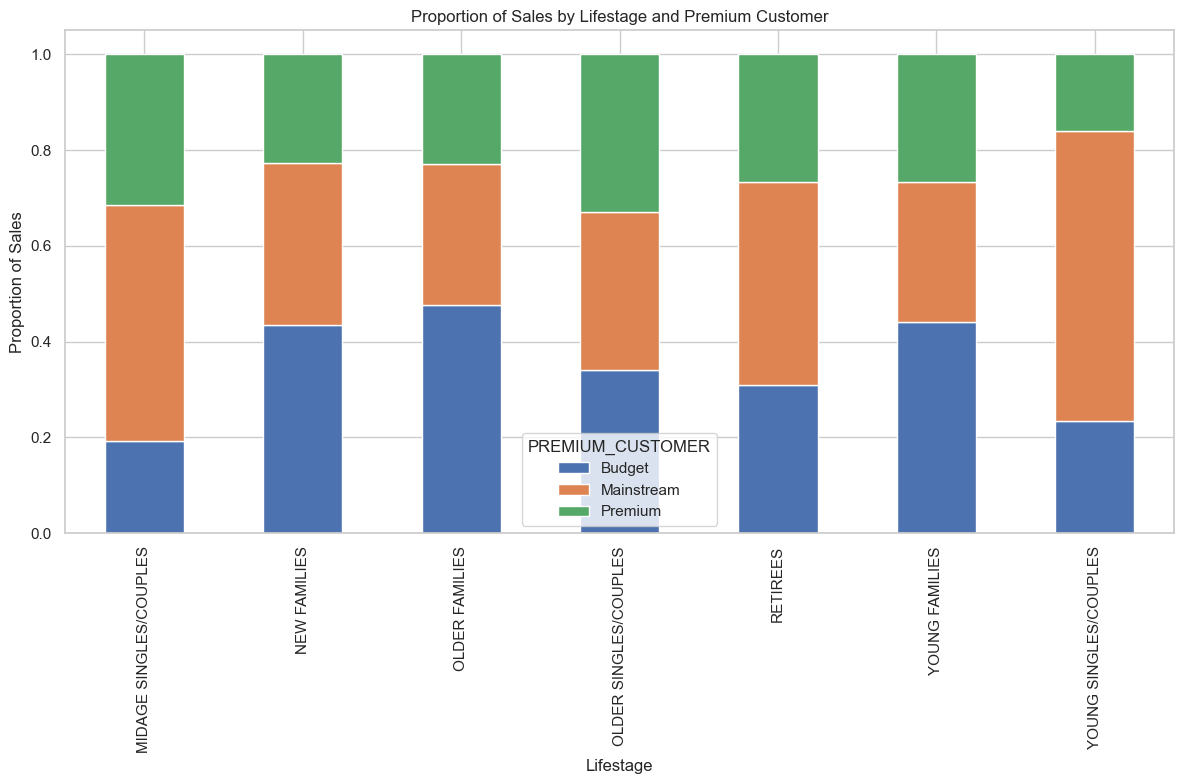

In [42]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Pivot the data for plotting
pivot_sales = sales.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'TOT_SALES')

# Normalize the data for proportions
pivot_sales = pivot_sales.div(pivot_sales.sum(axis=1), axis=0)

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart with percentages on the bars
bars = pivot_sales.plot(kind='bar', stacked=True, ax=plt.gca())
    
# Set plot labels and title
plt.xlabel('Lifestage')
plt.ylabel('Proportion of Sales')
plt.title('Proportion of Sales by Lifestage and Premium Customer')

plt.tight_layout()
plt.show()

C:\Users\SARVESH SURVE\AppData\Local\Temp\ipykernel_17712\1800429672.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_customers = customers.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR')


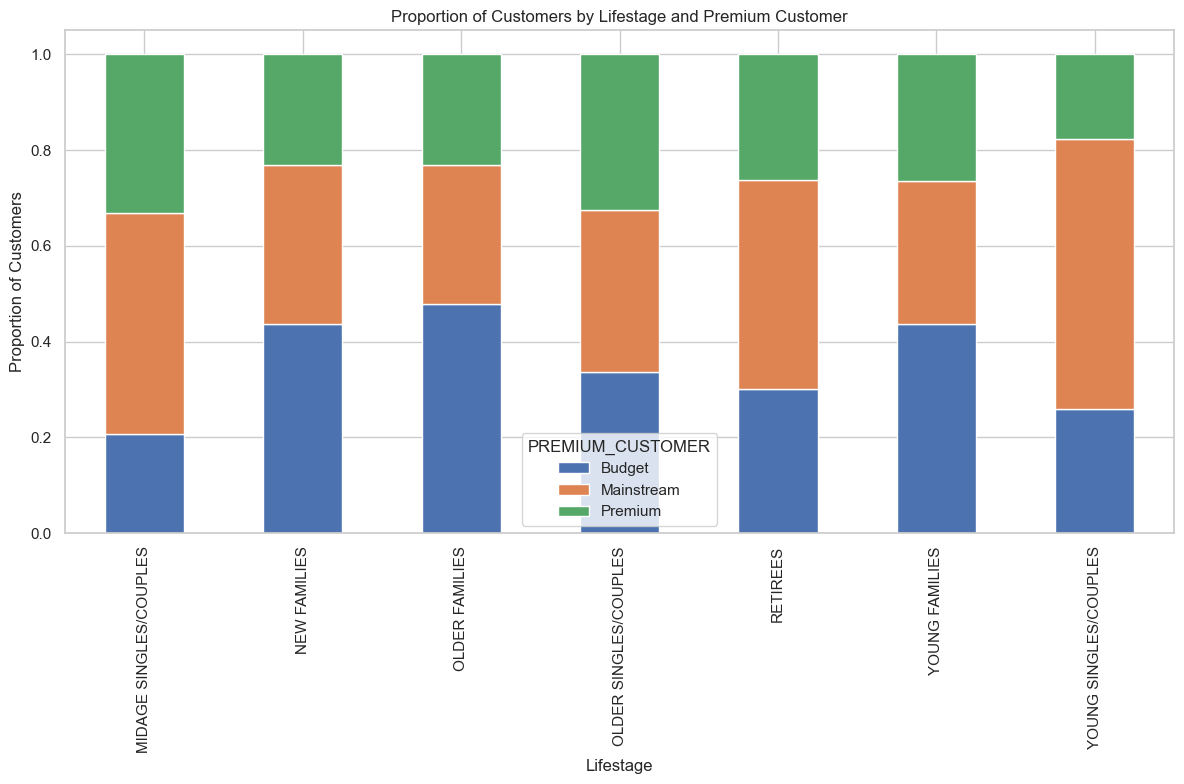

In [45]:
# Calculate number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = df_merged.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Pivot the data for plotting
pivot_customers = customers.pivot('LIFESTAGE', 'PREMIUM_CUSTOMER', 'LYLTY_CARD_NBR')

# Normalize the data for proportions
pivot_customers = pivot_customers.div(pivot_customers.sum(axis=1), axis=0)

# Create a larger figure
plt.figure(figsize=(12, 8))

# Plot the stacked bar chart with percentages on the bars
bars = pivot_customers.plot(kind='bar', stacked=True, ax=plt.gca())

# Set plot labels and title
plt.xlabel('Lifestage')
plt.ylabel('Proportion of Customers')
plt.title('Proportion of Customers by Lifestage and Premium Customer')

plt.tight_layout()
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget
- Older families segment.
Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this
next.

In [54]:
from scipy.stats import ttest_ind

# Assuming data contains your dataset

# Calculate the price per unit
df_merged['price'] = df_merged['TOT_SALES'] / df_merged['PROD_QTY']

# Select relevant data for the t-test
mainstream_data = df_merged[(df_merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream')]
non_mainstream_data = df_merged[(df_merged['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) & (df_merged['PREMIUM_CUSTOMER'] != 'Mainstream')]

# Perform the independent t-test
t_statistic, p_value = ttest_ind(mainstream_data['price'], non_mainstream_data['price'], alternative='greater')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 37.83196107667815
P-Value: 1.11782280577468e-309


**The t-test results show that the t-statistic is approximately 37.83 and the p-value is extremely close to zero (1.11782280577468e-309). This indicates strong evidence to reject the null hypothesis that the mean price per unit for mainstream midage and young singles and couples is greater than the mean price per unit for non-mainstream (budget and premium) midage and young singles and couples. In other words, there is a statistically significant difference in the average price per unit between these two groups, and the average price per unit is significantly higher for mainstream customers in this lifestage category.**

* **Deep dive into specific customer segments for insights**

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales. Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips

In [56]:
# Deep dive into Mainstream, young singles/couples
segment1 = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = df_merged[~((df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df_merged['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)

         BRAND  PROD_QTY_x  targetSegment  PROD_QTY_y     other  \
18    TYRRELLS        1143       0.031553       11155  0.025692   
17    TWISTIES        1673       0.046184       16445  0.037877   
5      DORITOS        4447       0.122761       43884  0.101075   
9       KETTLE        7172       0.197985       71879  0.165553   
16    TOSTITOS        1645       0.045411       16489  0.037978   
11    PRINGLES        4326       0.119420       43693  0.100635   
4         COBS        1617       0.044638       16954  0.039049   
8    INFUZIONS        2343       0.064679       24776  0.057065   
15       THINS        2187       0.060373       24742  0.056986   
7      GRNWVES        1185       0.032712       13541  0.031188   
3     CHEEZELS         651       0.017971        8096  0.018647   
13      SMITHS        3491       0.096370       54091  0.124584   
6       FRENCH         143       0.003948        2500  0.005758   
2      CHEETOS         291       0.008033        5239  0.01206

We can see that :

*  Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
*  Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [57]:
# Preferred pack size compared to the rest of the population
quantity_segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_pack['targetSegment'] = quantity_segment1_by_pack['PROD_QTY'] / quantity_segment1

quantity_other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
quantity_other_by_pack['other'] = quantity_other_by_pack['PROD_QTY'] / quantity_other

pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']
pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

print(pack_proportions)

    PACK_SIZE  PROD_QTY_x  targetSegment  PROD_QTY_y     other  affinityToPack
17      270.0        1153       0.031829       10896  0.025096        1.268287
19      380.0        1165       0.032160       11108  0.025584        1.257030
18      330.0        2220       0.061284       21779  0.050162        1.221717
4       134.0        4326       0.119420       43693  0.100635        1.186670
2       110.0        3850       0.106280       38985  0.089791        1.183637
14      210.0        1055       0.029124       10907  0.025121        1.159318
5       135.0         535       0.014769        5677  0.013075        1.129511
16      250.0         520       0.014355        5549  0.012781        1.123166
9       170.0        2926       0.080773       35162  0.080986        0.997370
6       150.0        5709       0.157598       70953  0.163421        0.964372
10      175.0        9237       0.254990      117230  0.270007        0.944382
8       165.0        2016       0.055652       27035

It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [59]:
unique_prod_names = df_merged[df_merged['PACK_SIZE'] == 270]['PROD_NAME'].unique()
print(unique_prod_names)

['Twisties Cheese     270g' 'Twisties Chicken270g']


Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties

## Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.

Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.